# Avocado dataset  (Term 2 Project)


## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Exploratory Data Analysis](#section4)<br>
    - 4.1 [Distribution of avg Price ](#section4_1)<br>
    - 4.2 [Plotting Avg Price variation wrt date time](#section4_2)<br>
    - 4.3 [Distribution of avg price month wise](#section4_3)<br>
    - 4.4 [Relationship between Avg Price and Total Volume](#section4_4)<br>
    - 4.5 [Pairwise relationships](#section4_5)<br>
    - 4.6 [Avg Price distribution across regions](#section4_6)<br>
    - 4.7 [Handling Categorical Variables](#section4_7)<br>
    - 4.8 [Correlation between features](#section4_8)<br>
5. [Model Creation and Evaluation](#section5)<br>
    - 5.1 [Preparing train and test data](#section5_1)<br>
    - 5.2 [Linear Regression Model over train and test data](#section5_2)<br>
    - 5.3 [Decision Tree alogorithm  over train and test data](#section5_3)<br>
    - 5.4 [Random Forest Model over train and test data](#section5_4)<br>
    - 5.5 [Feature Selection change](#section5_5)<br>


## 1. Problem Statement <a id=section1></a>

This dataset contains the Historical data on avocado prices and sales volume in multiple US markets. We will try to estimate and predict the Average Price using the given data.

## 2. Data Loading and Description<a id=section2></a>

In [11]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

#


In [12]:
avocado = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')
avocado.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [13]:
avocado.shape


(18249, 14)

This dataset contains 18249 rows over 14 columns

In [14]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [15]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


## 3. Preprocessing<a id=section3></a>

In [16]:
#Check if the data has any null/missing values
def lr():
    return avocado.isna().sum()
lr()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

This data does not have any null or missing values 

In [17]:
#Dropping uneccessary columns
avocado=avocado.drop('Unnamed: 0',axis =1)

In [18]:
avocado.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [19]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(avocado)
profile.to_file(outputfile="avocado_before_preprocessing.html")

## 4. Exploratory Data Analysis<a id=section4></a>

### 4.1. Distribution of avg Price <a id=section4_1></a>

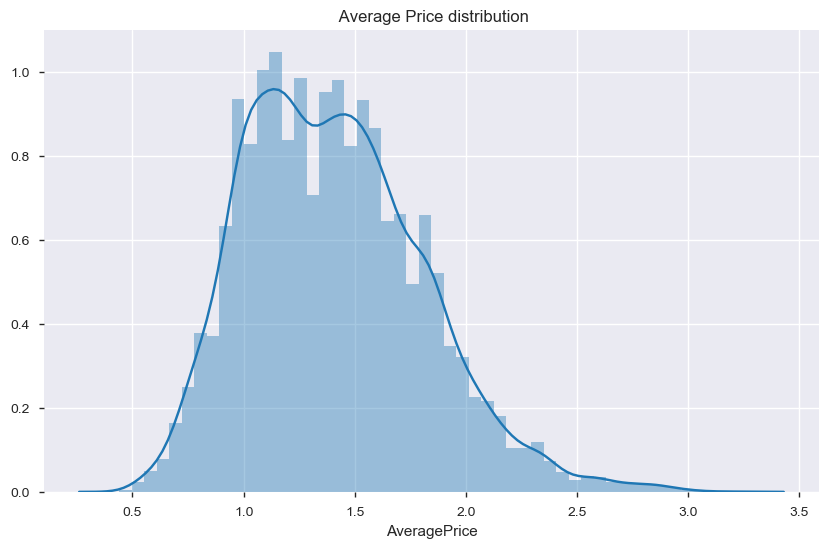

In [20]:
plt.figure(figsize=(10,6))
plt.title(" Average Price distribution")
ax = sns.distplot(avocado["AveragePrice"])

Average Prices are slightly skewed to their left. Highest number of avaocados are sold in the range of 1.1 and 1.6

Text(0.5,0,'Average Price')

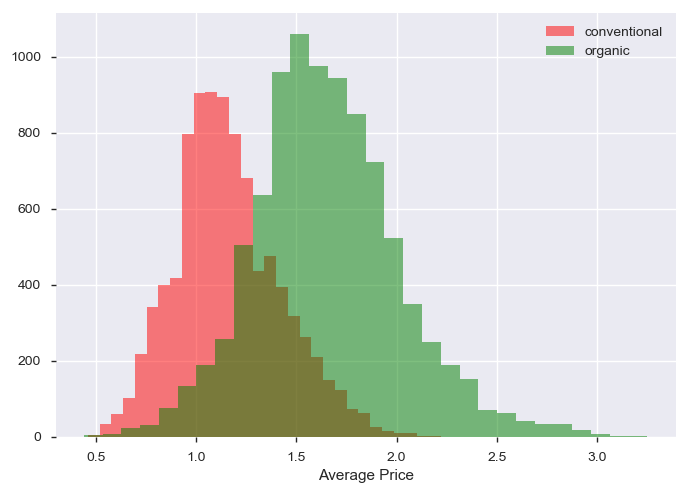

In [21]:
avocado[avocado['type']=='conventional']['AveragePrice'].hist(alpha=0.5,color='red',bins=30,label='conventional')
avocado[avocado['type']=='organic']['AveragePrice'].hist(alpha=0.5,color='green',bins=30,label='organic')
plt.legend()
plt.xlabel('Average Price')

Organic Avocados are sold at higher prices than conventional avocados.

#### Converting date into date time

In [22]:
avocado['Date'] = pd.to_datetime(avocado['Date'] )  


In [23]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


### 4.2 Plotting Avg Price variation wrt date time <a id=section4_2></a>

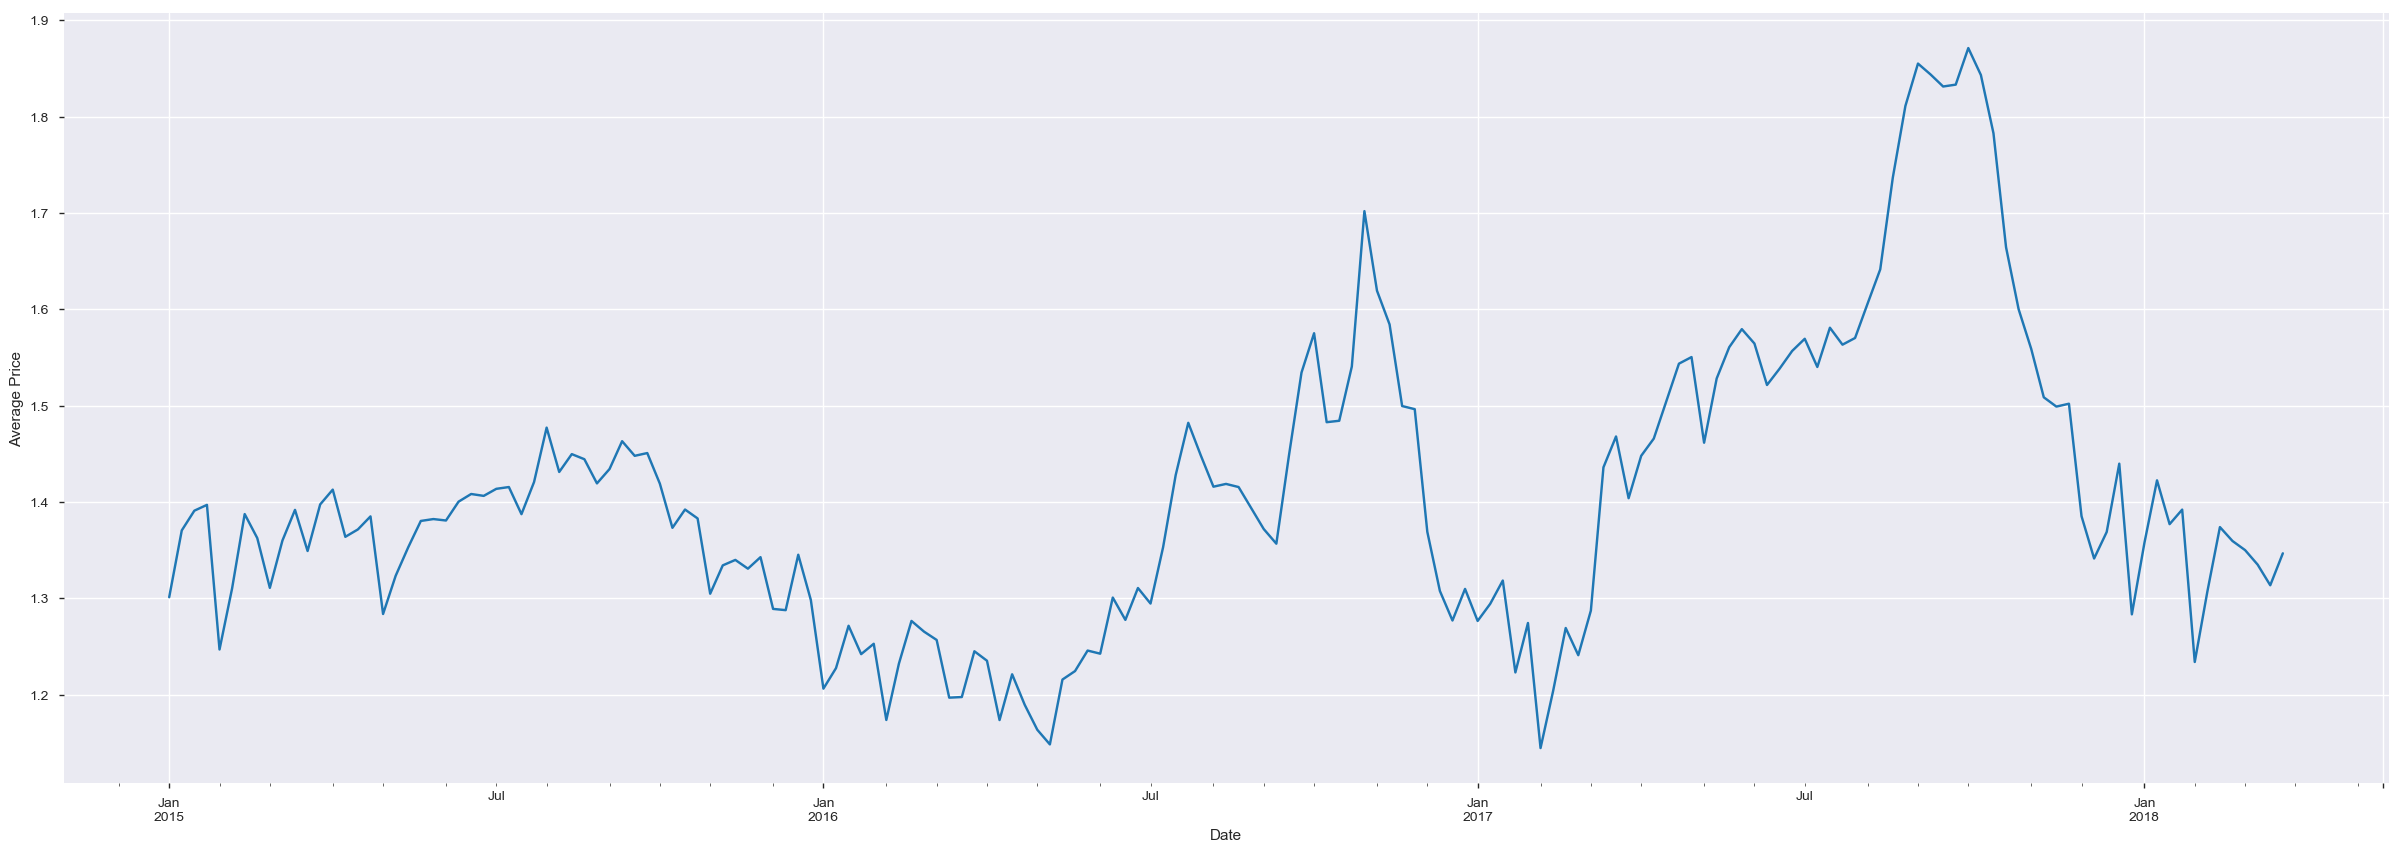

In [24]:
plt.figure(figsize=(30,10))
plt.ylabel('Average Price')

ag=avocado.groupby('Date').mean()['AveragePrice'].plot(x=avocado.Date)


The avg prices of avocados are more in the second half of each of the years when compared to first half of the year.
The increase in summer price could be due to  weak harvest in the year or insatiable demand for avocados.


Text(0,0.5,'Average Price')

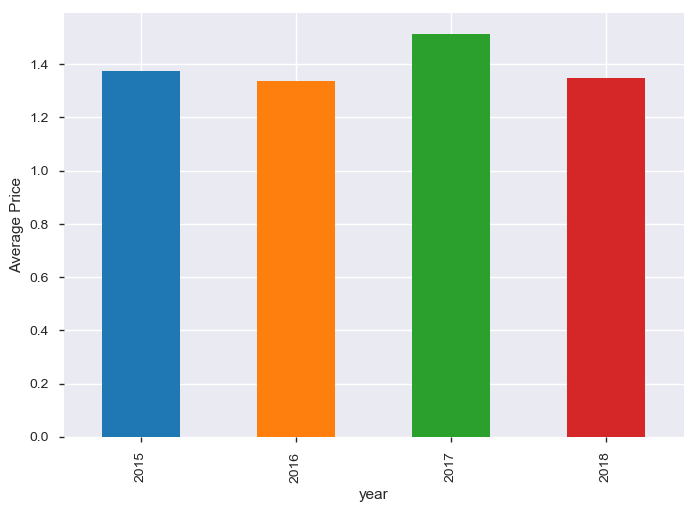

In [25]:
avocado.groupby('year').mean()['AveragePrice'].plot.bar()
plt.ylabel('Average Price')

Alsoyear 2017 recorded highest average price of avocados

#### Creating 2 more features from date column

In [26]:
avocado['Month']=avocado['Date'].apply(lambda x:x.month)
avocado['Day']=avocado['Date'].apply(lambda x:x.day)

In [27]:
avocado.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


### 4.3 Distribution of avg price month wise <a id=section4_3></a>

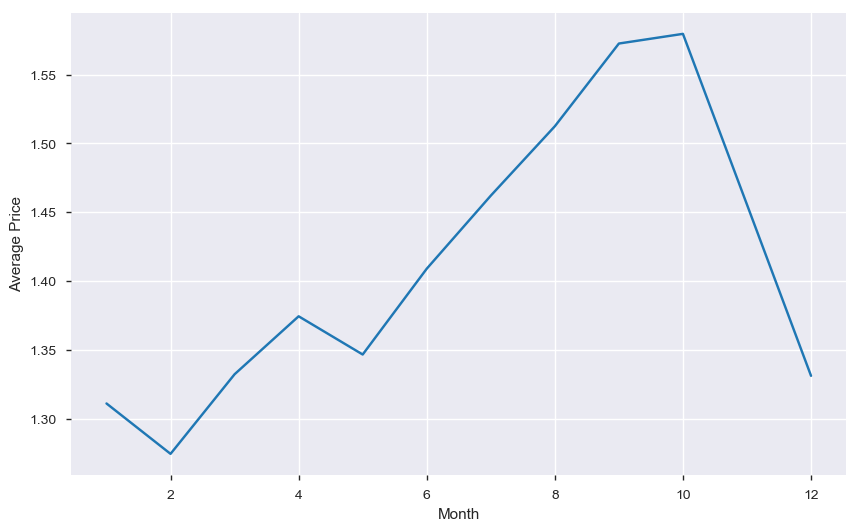

In [22]:
#Distribution of avg price month wise


plt.figure(figsize=(10,6))
plt.ylabel('Average Price')
ag=avocado.groupby('Month').mean()['AveragePrice'].plot(x=avocado.Date)


Average price have been increasing after May, may be because of seasons demand.
The price of unit avocado has hit the highest in months of September and October.


### 4.4 Relationship between Avg Price and Total Volume <a id=section4_4></a>

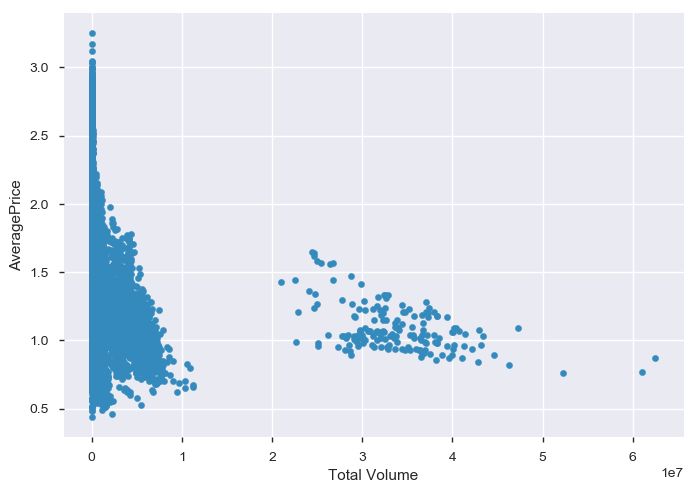

In [30]:
avocado.plot.scatter(x='Total Volume', y='AveragePrice')#,hue='type')

There is a relation between the avg price and total volume sold per day post 20000000 avocados as the total volume increases the avg unit price decreases.

### 4.5 Pairwise relationships <a id=section4_5></a>

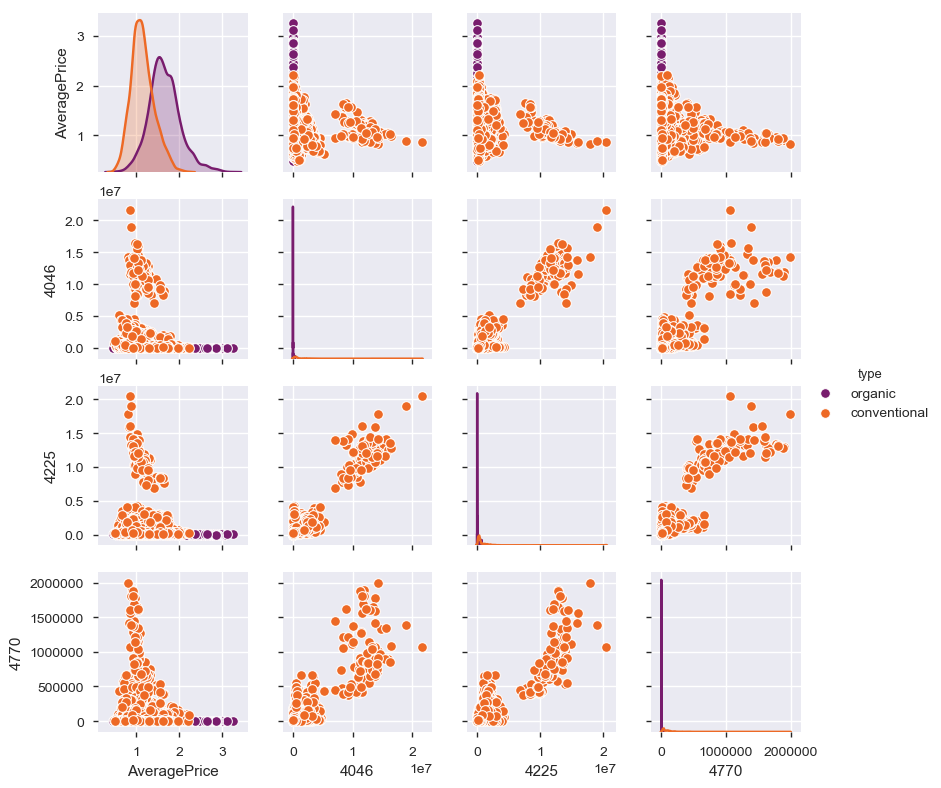

In [24]:
#sns.pairplot(avocado[['AveragePrice','Total Volume','4046','4225','4770']], palette="inferno", size=2)
sns.pairplot(avocado[['AveragePrice','4046','4225','4770','type']].sample(10000),hue='type',palette="inferno", size=2)


There is positive correlation between total no. of avocados of PLU 4046 and 4425.

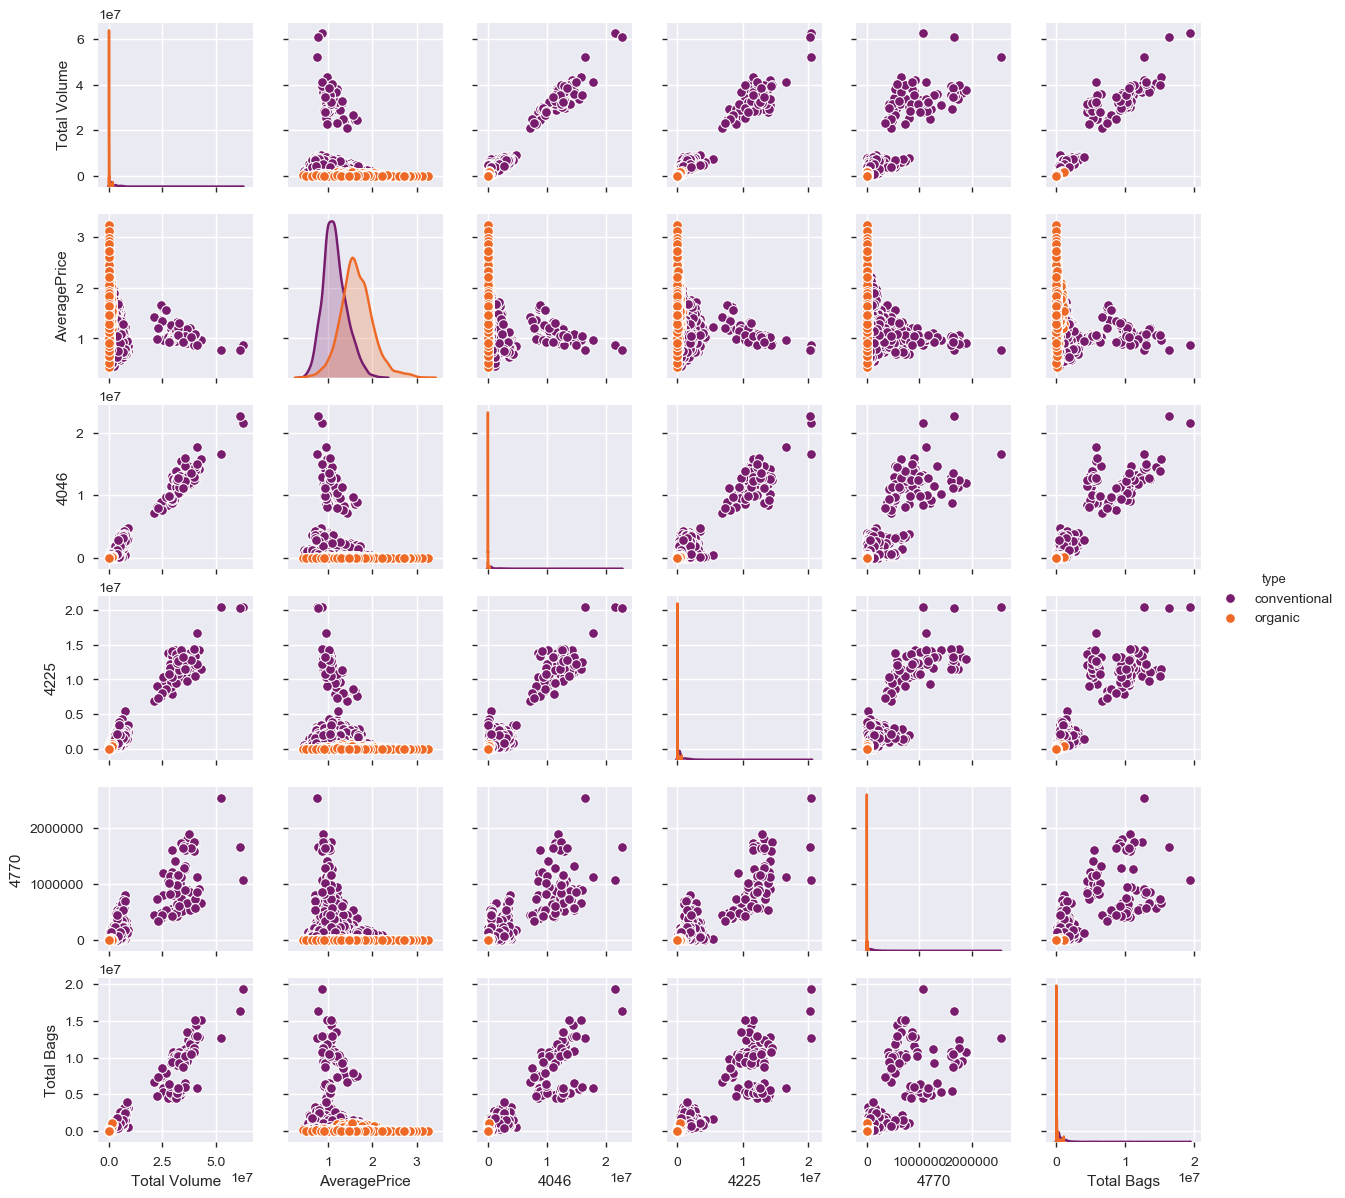

In [25]:
#sns.pairplot(avocado[['AveragePrice','Total Volume','4046','4225','4770']], palette="inferno", size=2)
sns.pairplot(avocado[['Total Volume','AveragePrice','4046','4225','4770','Total Bags','type']].sample(10000),hue='type',palette="inferno", size=2)

Total Volume is highly correlated with PLU 4046,4225 and total bags.

There is positive correlation between total no. of avocados of PLU 4046 and 4425.

Organic Avocados are mostly sold in lower Volumes/quantities.

### 4.6 Avg Price distribution across regions <a id=section4_6></a>

Text(0,0.5,'Region')

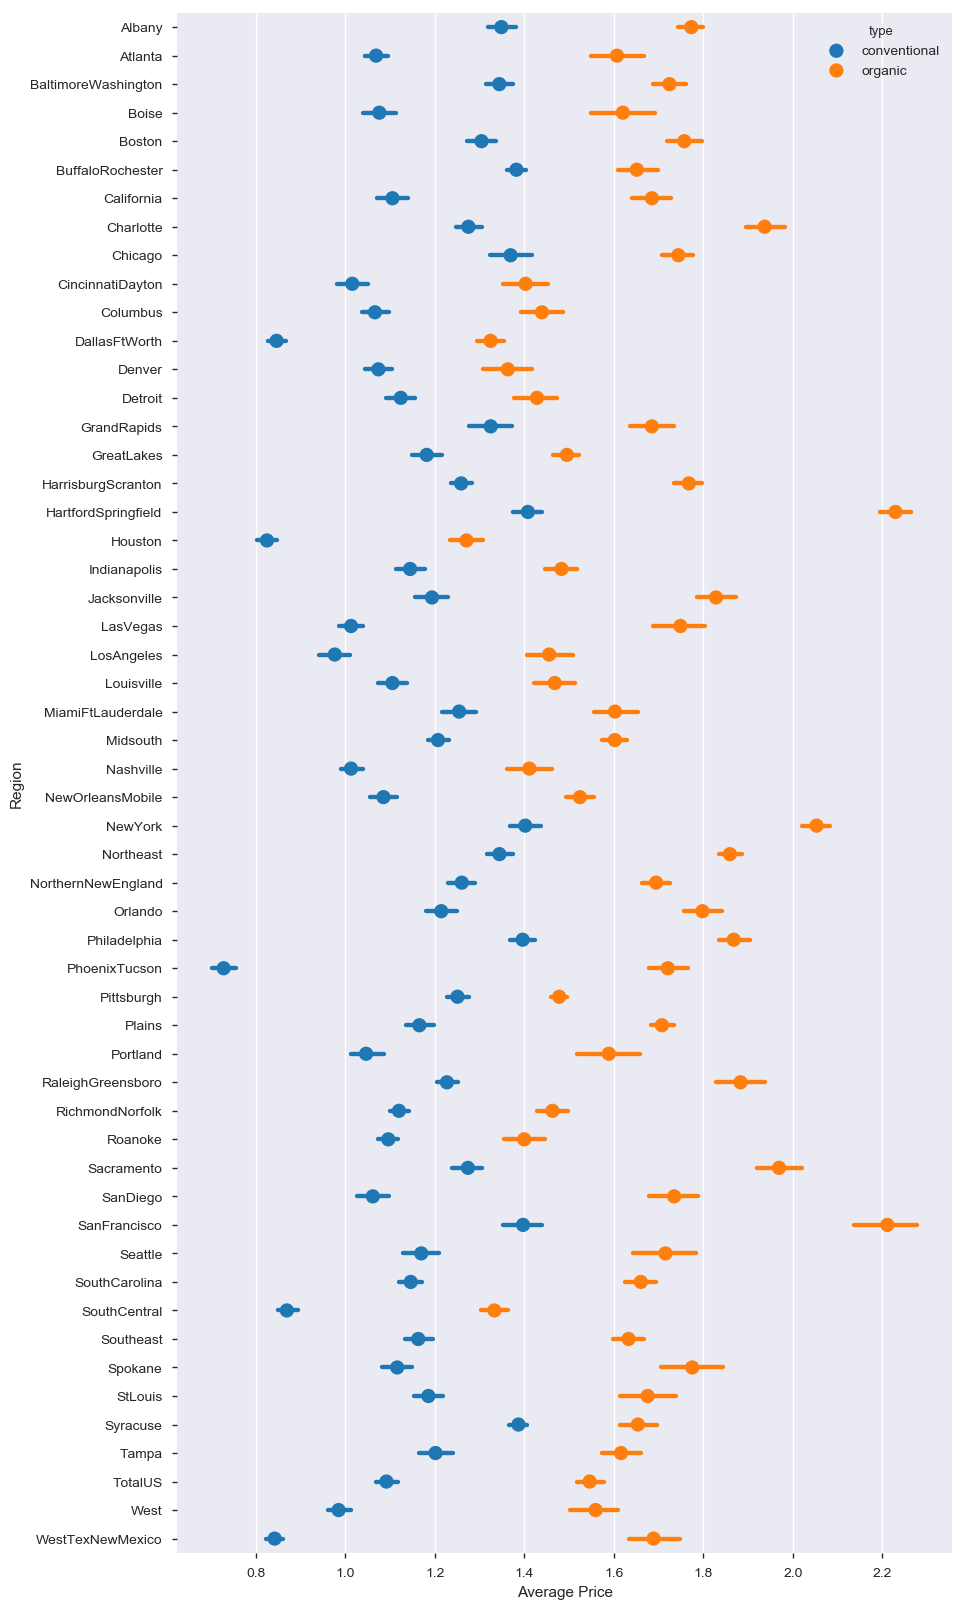

In [27]:
plt.figure(figsize=(10,20))

sns.pointplot(y="region", x="AveragePrice", data=avocado,hue="type",join=False)
plt.xlabel('Average Price')
plt.ylabel('Region')

HeartffordSpringfield has the highest average price of conventional and organic avocado when compared to other cities.

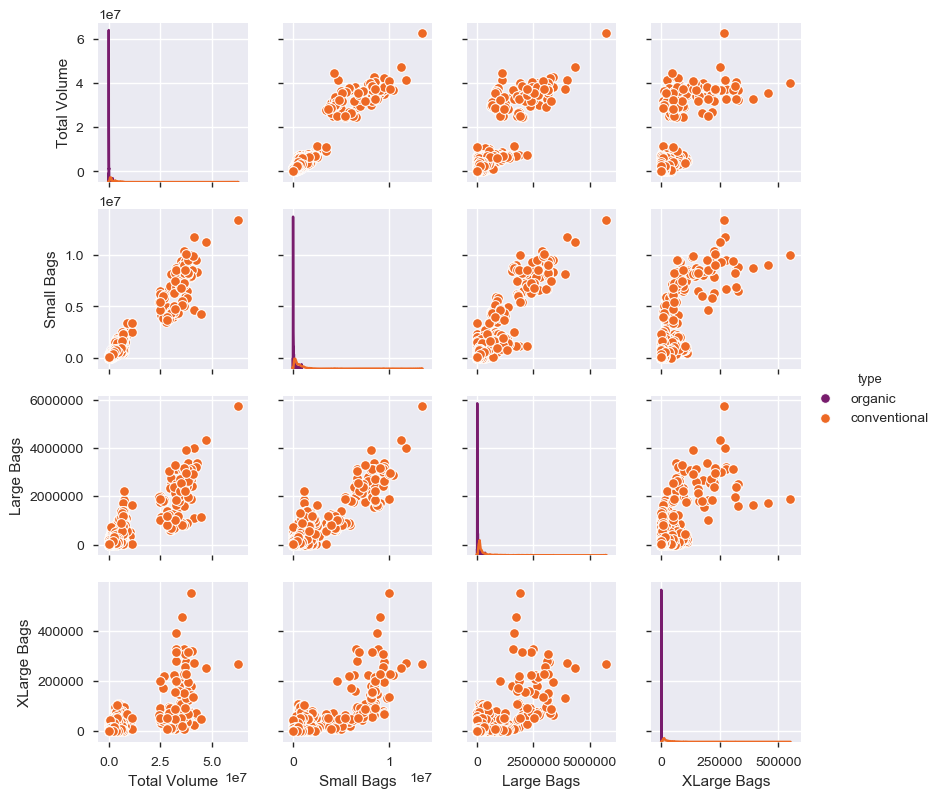

In [29]:
#sns.lmplot(x='Small Bags', y='Total Volume', markers=['o','*'], hue='type', data=avocado,  fit_reg=False  )
sns.pairplot(avocado[['Total Volume','Small Bags','Large Bags','XLarge Bags','type']].sample(10000),hue='type',palette="inferno", size=2)

There is high correlation between no. of small bags and Large bags sold. Also the no. of small bags sold and total volume of avocados are positively correlated.

### 4.7 Handling Categorical Variables <a id=section4_7></a>

In [32]:
#create dummy for category variable type
data = pd.DataFrame()
def tree():
    data = pd.get_dummies(avocado,columns=['type'],drop_first=True)
    return(data)
data = tree()

In [31]:
data.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,0


In [33]:
#encoding the categorical varaible region using LabelEncoder
data_cont=data.drop(['region'],axis=1)
data_cat=data[['region']]
#print(data_cont.head(2))
#print(data_cat.head(2))
from sklearn.preprocessing import LabelEncoder
data_cat=data_cat.apply(LabelEncoder().fit_transform)
#print(data_cat.head(2))

In [34]:
final_data= pd.concat([data_cont,data_cat],axis=1)

In [35]:
final_data=final_data.drop(['Date'],axis=1)

In [36]:
final_data.shape
final_data.sample(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic,region
1777,1.22,69191.72,2301.40,40984.47,1289.08,24616.77,13587.31,11029.46,0.0,2015,10,25,0,34
2759,0.74,623231.77,398871.12,133434.18,21088.12,69838.35,68233.56,1604.79,0.0,2015,12,6,0,53
14434,1.04,10510.27,1377.36,537.00,0.00,8595.91,1375.01,7220.90,0.0,2016,11,20,1,48


### 4.8 Correlation between features <a id=section4_8></a>

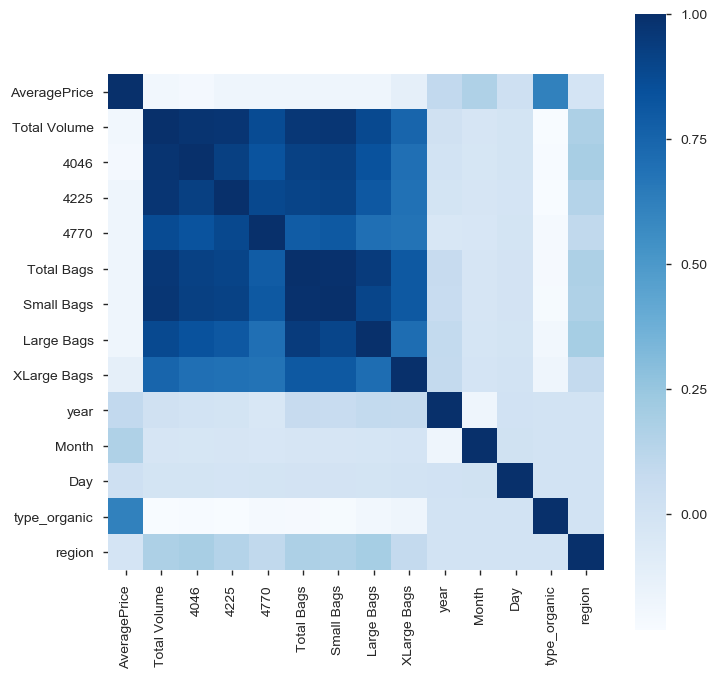

In [37]:
features_correlation = final_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

 We clearly see that the only variable that is highly correlated with avg Price is type_organic

## 5. Model Creation and Evaluation<a id=section5></a>

### 5.1 Preparing train and test data <a id=section5_1></a>

In [38]:
#CDefine the independent variables i.e X.
X = final_data.loc[:,final_data.columns != 'AveragePrice']

In [39]:
X.shape

(18249, 13)

In [40]:
#define the dependent variable y
y=final_data['AveragePrice']

In [41]:
y.shape

(18249,)

In [42]:
#train test data splitting
from sklearn.cross_validation import train_test_split
def split_data(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)# train test split using train test split of 70:30 and random state=1
X_train, X_test, y_train, y_test = split_data(X,y)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12774, 13)
(12774,)
(5475, 13)
(5475,)


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12774 entries, 9513 to 235
Data columns (total 13 columns):
Total Volume    12774 non-null float64
4046            12774 non-null float64
4225            12774 non-null float64
4770            12774 non-null float64
Total Bags      12774 non-null float64
Small Bags      12774 non-null float64
Large Bags      12774 non-null float64
XLarge Bags     12774 non-null float64
year            12774 non-null int64
Month           12774 non-null int64
Day             12774 non-null int64
type_organic    12774 non-null uint8
region          12774 non-null int64
dtypes: float64(8), int64(4), uint8(1)
memory usage: 1.3 MB


### 5.2 Linear Regression Model over train and test data <a id=section5_2></a>

In [45]:
def linear_reg( X, y):
    
    X_train, X_test, y_train, y_test = split_data(X,y)
    
    from sklearn.linear_model import LinearRegression
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)  # make predictions on the testing set
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set using Linear Reg is {}'.format(MAE_train))
    print('MAE for test set using Linear Reg is {}'.format(MAE_test))
    
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set using Linear Reg is {}'.format(MSE_train))
    print('MSE for test set using Linear Reg  is {}'.format(MSE_test))
    
    import numpy as np
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set using Linear Reg is {}'.format(RMSE_train))
    print('RMSE for test set using Linear Reg is {}'.format(RMSE_test))
    
    from sklearn.metrics import r2_score
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set using Linear Reg is {}'.format(R2_train))
    print('R2 for test set is using Linear Reg is {}'.format(R2_test))

    
        
    return linreg

In [46]:
linreg = linear_reg(X,y)

MAE for training set using Linear Reg is 0.2318623049982371
MAE for test set using Linear Reg is 0.232654585349354
MSE for training set using Linear Reg is 0.09106552835955779
MSE for test set using Linear Reg  is 0.09068413174210221
RMSE for training set using Linear Reg is 0.30177065523267466
RMSE for test set using Linear Reg is 0.30113806093236073
R2 for training set using Linear Reg is 0.44079145280759957
R2 for test set is using Linear Reg is 0.4349423568280557


__For test data__:

Mean Absolute Error is __0.232__

Mean Squared Error is __0.091__

Root MEan Squared error is __0.301__

In [111]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)
feature_cols=X.columns

feature_cols=feature_cols.insert(0,'Intercept')

coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)


Intercept: -109.8217140881092
Coefficients: [-7.53978390e-05  7.53065055e-05  7.55107718e-05  7.50447085e-05
 -2.17341542e-02  2.18095606e-02  2.18094059e-02  2.18110267e-02
  5.49735386e-02  2.05295760e-02  1.04550005e-03  4.91108473e-01
  2.74196135e-04]
Intercept -109.8217140881092
Total Volume -7.539783898407152e-05
4046 7.53065055143334e-05
4225 7.551077183926053e-05
4770 7.504470854765843e-05
Total Bags -0.02173415417993599
Small Bags 0.02180956063588242
Large Bags 0.021809405887772033
XLarge Bags 0.021811026653821976
year 0.05497353860665189
Month 0.020529576031595876
Day 0.0010455000485833732
type_organic 0.49110847266291935
region 0.000274196135411764


#### Applying  GridSearch CV over  Linear Regression to check if error reduces

In [47]:
def linear_regGridSearch( X, y):
    
    X_train, X_test, y_train, y_test = split_data(X,y)
    
    from sklearn.linear_model import LinearRegression

    from sklearn.model_selection import GridSearchCV
    
    linreg = LinearRegression()
    parameters = {'normalize':[True,False], 'copy_X':[True, False]}
    linreg = GridSearchCV(linreg,parameters, cv = 10)
    linreg.fit(X_train, y_train)                          # fit the model to the training data (learn the coefficients)
    print("Mean cross-validated score of the best_estimator : ", linreg.best_score_) 
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)                                     # make predictions on the testing set
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set using Linear Reg Grid Search is {}'.format(MAE_train))
    print('MAE for test set using Linear Reg Grid Search is {}'.format(MAE_test))
    
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set using Linear Reg Grid Search is {}'.format(MSE_train))
    print('MSE for test set using Linear Reg Grid Search is {}'.format(MSE_test))
    
    import numpy as np
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set using Linear Reg Grid Search is {}'.format(RMSE_train))
    print('RMSE for test set using Linear Reg Grid Search is {}'.format(RMSE_test))
    
    from sklearn.metrics import r2_score
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set using Linear Reg Grid Search is {}'.format(R2_train))
    print('R2 for test set using Linear Reg Grid Search is {}'.format(R2_test))
        
    return linreg

In [48]:
linreg = linear_regGridSearch(X,y)

Mean cross-validated score of the best_estimator :  0.4383014605117415
MAE for training set using Linear Reg Grid Search is 0.2318623049982371
MAE for test set using Linear Reg Grid Search is 0.232654585349354
MSE for training set using Linear Reg Grid Search is 0.09106552835955779
MSE for test set using Linear Reg Grid Search is 0.09068413174210221
RMSE for training set using Linear Reg Grid Search is 0.30177065523267466
RMSE for test set using Linear Reg Grid Search is 0.30113806093236073
R2 for training set using Linear Reg Grid Search is 0.44079145280759957
R2 for test set using Linear Reg Grid Search is 0.4349423568280557


__For test data__:

Mean Absolute Error is __0.232__

Mean Squared Error is __0.091__

Root MEan Squared error is __0.301__

### 5.3 Decision Tree alogorithm  over train and test data <a id=section5_3></a>

In [49]:
def dtreeModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.tree import DecisionTreeRegressor
    dtree=DecisionTreeRegressor(random_state = 0)
    dtree.fit(X_train, y_train)
    y_pred_train = dtree.predict(X_train)  
    y_pred_test = dtree.predict(X_test) 
    
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set using Dtree is {}'.format(MAE_train))
    print('MAE for test set using Dtree  is {}'.format(MAE_test))
    
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set using Dtree is {}'.format(MSE_train))
    print('MSE for test set using Dtree is {}'.format(MSE_test))
    
    import numpy as np
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set using Dtree is {}'.format(RMSE_train))
    print('RMSE for test set using Dtree is {}'.format(RMSE_test))
    
    from sklearn.metrics import r2_score
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set using Dtree is {}'.format(R2_train))
    print('R2 for test set is using Dtree is {}'.format(R2_test))
    
    return dtree


In [50]:
dtree= dtreeModel(X,y)

MAE for training set using Dtree is 1.0951002121713616e-18
MAE for test set using Dtree  is 0.13047488584474887
MSE for training set using Dtree is 2.1421334468337128e-34
MSE for test set using Dtree is 0.03976710502283105
RMSE for training set using Dtree is 1.463602899298069e-17
RMSE for test set using Dtree is 0.1994169125797284
R2 for training set using Dtree is 1.0
R2 for test set is using Dtree is 0.752209055671649


__For test data__:

Mean Absolute Error is __0.130__

Mean Squared Error is __0.039__

Root MEan Squared error is __0.199__

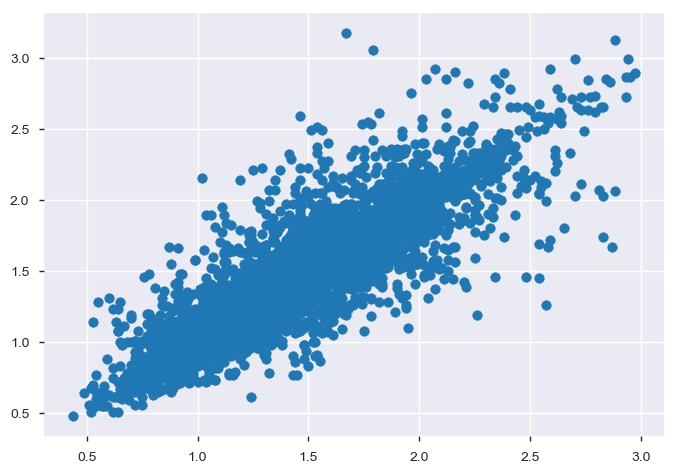

In [64]:
plt.scatter(x=y_test,y=y_pred_test)

The errors have significantly decreased with the use of Decision Trees. Let us try with the Grid Search approach of the Decision tree.

#### Applying Decision Tree model with GridSearchCV

In [51]:
def dtreeModel_usingGridSearch(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import GridSearchCV
    
    decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
    tree_para = [{'criterion':['mse','mae'],'max_depth': range(2,20),
                             'max_features': ['sqrt', 'log2', None] }]
         
    grid_search = GridSearchCV(decision_tree_regressor,tree_para, cv=10)
    grid_search.fit(X_train, y_train)
    
    y_pred_train = grid_search.predict(X_train)  
    y_pred_test = grid_search.predict(X_test) 
    
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set using Dtree is {}'.format(MAE_train))
    print('MAE for test set using Dtree  is {}'.format(MAE_test))
    
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set using Dtree is {}'.format(MSE_train))
    print('MSE for test set using Dtree is {}'.format(MSE_test))
    
    import numpy as np
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set using Dtree is {}'.format(RMSE_train))
    print('RMSE for test set using Dtree is {}'.format(RMSE_test))
    
        
    from sklearn.metrics import r2_score
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set using Dtree is {}'.format(R2_train))
    print('R2 for test set is using Dtree is {}'.format(R2_test))
    
    return dtree

In [66]:
dtree_GS= dtreeModel_usingGridSearch(X,y)

MAE for training set using Dtree is 0.037408659196561854

MAE for test set using Dtree  is 0.13014209895137144

MSE for training set using Dtree is 0.004916894323178838

MSE for test set using Dtree is 0.038282404913758894

RMSE for training set using Dtree is 0.07012056990055655

RMSE for test set using Dtree is 0.1956588993983123

R2 for training set using Dtree is 0.9698066943585155

R2 for test set is using Dtree is 0.7614603009373071

### 5.4 Random Forest Model over train and test data <a id=section5_4></a>

In [52]:
def RFModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.ensemble import RandomForestRegressor
    RF=RandomForestRegressor(random_state = 0)
    RF.fit(X_train, y_train)
    y_pred_train = RF.predict(X_train)  
    y_pred_test = RF.predict(X_test) 
    
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set using Random Forest is {}'.format(MAE_train))
    print('MAE for test set using Random Forest  is {}'.format(MAE_test))
    
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set using Random Forest is {}'.format(MSE_train))
    print('MSE for test set using Random Forest is {}'.format(MSE_test))
    
    import numpy as np
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set using Random Forest is {}'.format(RMSE_train))
    print('RMSE for test set using Random Forest is {}'.format(RMSE_test))
    
    from sklearn.metrics import r2_score
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set using Random Forest is {}'.format(R2_train))
    print('R2 for test set is using Random Forest is {}'.format(R2_test))
    
    return RF

In [53]:
rfmodel= RFModel(X,y)

MAE for training set using Random Forest is 0.042020510411773924
MAE for test set using Random Forest  is 0.10072639269406393
MSE for training set using Random Forest is 0.004100604352591201
MSE for test set using Random Forest is 0.02087342703196347
RMSE for training set using Random Forest is 0.06403596140131887
RMSE for test set using Random Forest is 0.1444763891850965
R2 for training set using Random Forest is 0.9748193082066197
R2 for test set is using Random Forest is 0.8699365671036483


__For test data__:

Mean Absolute Error is __0.1__

Mean Squared Error is __0.02__

Root MEan Squared error is __0.144__

In [ ]:
The accuracy has increased when compared to the decision tree model. Let us try with the Random forest CV model

In [10]:
def RFCVModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.ensemble import RandomForestRegressor
    RF=RandomForestRegressor(random_state = 0)
        from sklearn.model_selection import RandomizedSearchCV
    from scipy.stats import randint as sp_randint

    param_dist = {"max_depth": range(2,5),
                  "min_samples_split": sp_randint(2, 8),
                  "min_samples_leaf": sp_randint(1, 8),
                  "bootstrap": [True, False],
                  "n_estimators": [100, 400, 700, 1000, 1500],
                  "criterion" : ["mse", "mae"],
                  'max_features': ['sqrt', None]
             }
    
    # run randomized search
    n_iter_search = 25 
    random_search = RandomizedSearchCV(RF, param_distributions = param_dist,
                                       n_iter = n_iter_search,
                                       cv = 3, verbose=2,
                                       n_jobs = -1)
    
    random_search.fit(X_train, y_train)
    y_pred_train = random_search.predict(X_train)  
    y_pred_test = random_search.predict(X_test) 
    
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set using Random Forest random search is {}'.format(MAE_train))
    print('MAE for test set using Random Forest random search  is {}'.format(MAE_test))
    
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set using Random Forest random search is {}'.format(MSE_train))
    print('MSE for test set using Random Forest random search is {}'.format(MSE_test))
    
    import numpy as np
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set using Random Forest random search is {}'.format(RMSE_train))
    print('RMSE for test set using Random Forest random search is {}'.format(RMSE_test))
    
    from sklearn.metrics import r2_score
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set using Random Forest random search is {}'.format(R2_train))
    print('R2 for test set is using Random Forest random search is {}'.format(R2_test))
    
    return random_search

In [ ]:
#rf_rand_search_model= RFCVModel(X,y)


# This is taking very long time to exwcute in Colab. Hemce could not get the result.

### 5.5 Feature Selection change <a id=section5_5></a>
Using some selected data columns as independent Variables 
Choosing Total Volume ,4046 ,4225 ,Large Bags,year, month, type


In [55]:
fea_columns=['Total Volume','4046','4225','Large Bags','year','Month','type_organic']
X = final_data[fea_columns]
y=final_data['AveragePrice']
print(X.shape)
print(y.shape)

(18249, 7)
(18249,)


In [56]:
linreg1 = linear_reg(X,y)

MAE for training set using Linear Reg is 0.23280129546807876
MAE for test set using Linear Reg is 0.2340445536827068
MSE for training set using Linear Reg is 0.0915967840504336
MSE for test set using Linear Reg  is 0.0913760408965759
RMSE for training set using Linear Reg is 0.30264960606356917
RMSE for test set using Linear Reg is 0.30228470172434446
R2 for training set using Linear Reg is 0.4375291566519195
R2 for test set is using Linear Reg is 0.4306310341235733


In [57]:
dtree1= dtreeModel(X,y)

MAE for training set using Dtree is 6.083890067618676e-19
MAE for test set using Dtree  is 0.14409680365296804
MSE for training set using Dtree is 1.1772084707824908e-34
MSE for test set using Dtree is 0.049562429223744285
RMSE for training set using Dtree is 1.0849923828223361e-17
RMSE for test set using Dtree is 0.22262620965138918
R2 for training set using Dtree is 1.0
R2 for test set is using Dtree is 0.6911738701243695


In [58]:
rfmodel1= RFModel(X,y)

MAE for training set using Random Forest is 0.04597009550649758
MAE for test set using Random Forest  is 0.11373022831050228
MSE for training set using Random Forest is 0.005124590887740723
MSE for test set using Random Forest is 0.027152062648401823
RMSE for training set using Random Forest is 0.07158624789539345
RMSE for test set using Random Forest is 0.16477882949093256
R2 for training set using Random Forest is 0.968531286460294
R2 for test set is using Random Forest is 0.8308140549771641


The error values have not decreased with running models with selected features. 
The accuarcy of the models were better when all the features were considered.
Hence we will consider all the features.


Also Random Forest is giving the least error in prediction as compared to other models with RMSE value as 0.14 hence we choose the algorithm for prediction of avocado prices.